# **Modelo predictivo de satisfacción en proyecto solidario**

Ángel Azahel Ramírez Cabello - A01383328

Annete Pamela Ruiz Abreu - A01423595

Luis Angel López Chávez - A01571000

Jorge Raúl Rocha López - A01740816

Franco Mendoza Muraira - A01383399

Datasets: https://drive.google.com/file/d/1pP523QcG0W4gHYq1NbNTZWVjW3xRdHwC/view?usp=sharing

# Etapa 2: Comprensión y Preparación de los datos

In [304]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.1/1.1 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 22.7/22.7 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 3.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [305]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import geopandas as gpd

In [2]:
# Lectura de archivos
d1 = pd.read_excel("Datos/Encuesta+a+Estudiantes+PS_17+de+mayo+de+2023_12.05.xlsx", header=1)
d2 = pd.read_excel("Datos/Estudiantes+PS_INV23+TEC21_17+de+mayo+de+2023_12.22.xlsx", header=1)
d3 = pd.read_excel("Datos/Estudiantes+PS+AD22+TEC21_17+de+mayo+de+2023_12.07.xlsx", header=1)
d4 = pd.read_excel("Datos/Estudiantes+PS+FJ22+TEC21_17+de+mayo+de+2023_12.17.xlsx", header=1)
d5 = pd.read_excel("Datos/Estudiantes+PS+FJ23_17+de+mayo+de+2023_12.28.xlsx", header=1)

In [3]:
d4

,Fecha de inicio,Fecha final,Tipo de respuesta,Dirección IP,Progreso,Duración (en segundos),Finalizado,Fecha registrada,ID de respuesta,ID,...,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos","5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia",6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:,6.1 Tu comentario sobre la experiencia es:,CRN,Nombre de Experiencia,OSF,Periodo,Semana,Tipo de Formato
0,2022-05-02 22:05:13,2022-05-02 22:08:49,IP Address,189.208.147.102,100,216,True,2022-05-02 22:08:50.149,R_1gehSzL4JdrOfjO,@00001,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Fue una experiencia muy bonita y enriquecedora...,Reconocimiento,27964,"El mundo escribe, somos lenguaje","Fundación El Mundo Escribe, A.C.",202211,2,Regular
1,2022-05-02 22:39:06,2022-05-02 22:40:31,IP Address,189.213.45.132,100,85,True,2022-05-02 22:40:32.137,R_3qkQ9piea9AUgmi,@00002,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Es la segunda vez que colaboro con Tierra de A...,Reconocimiento,27968,Taller de medicina tradicional a través de la ...,"Tierra de Artistas, A.C.",202211,2,Regular
2,2022-05-02 23:09:38,2022-05-02 23:12:52,IP Address,189.207.111.252,100,193,True,2022-05-02 23:12:52.823,R_3fpJqAdwRBNvLQL,@00003,...,4,\n5 Totalmente de Acuerdo,Una vez que ya he hecho un proyecto solidario ...,Área de oportunidad,27977,UNO hace la diferencia,Centro VALIA,202211,1-2,Regular
3,2022-05-03 02:03:36,2022-05-03 02:05:45,IP Address,80.254.69.79,100,128,True,2022-05-03 02:05:45.430,R_5vFwpnvS5MOGxNf,@00004,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,"Es demandante en cuestión de tiempos, pero val...",Reconocimiento,28239,Prepanet - Tutor en Línea,Prepanet Monterrey,202211,1-2,Regular
4,2022-05-03 08:29:03,2022-05-03 08:31:32,IP Address,131.178.102.136,100,149,True,2022-05-03 08:31:33.182,R_2dstcehHxAMBSbS,@00005,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,"Apoyé mucho a una alumna, le compartí acerca d...",Reconocimiento,28239,Prepanet - Tutor en Línea,Prepanet Monterrey,202211,1-2,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,2022-06-21 14:49:33,2022-06-21 14:51:25,IP Address,187.167.203.12,100,111,True,2022-06-21 14:51:25.548,R_2Qht1tDIhfyi7IV,@01775,...,4,4,Los niños no siempre\nTienen el mismo interes\...,Área de oportunidad,28284,"Contenido de Valor ""CREando Espacios de Aprend...","Compromiso y Responsabilidad Educativa, ABP",3,1-3,Regular
1775,2022-06-22 13:16:43,2022-06-22 13:18:27,IP Address,131.178.102.212,100,104,True,2022-06-22 13:18:28.280,R_1jrfaZ3c0QXSuxE,@01776,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Esta experiencia de servicio social fue algo m...,Reconocimiento,28287,Voluntariado en Campo,"Un Techo para mi País México, A.C.",3,1-3,Regular
1776,2022-06-23 18:22:58,2022-06-23 18:24:31,IP Address,50.255.188.225,100,92,True,2022-06-23 18:24:31.916,R_2vivrdMA6j7764X,@01777,...,4,4,Me gusto mucho ya que ayudamos a la educacion ...,Reconocimiento,28279,Vico Valores,"Soñar Despierto, A.C.",3,1-3,Regular
1777,2022-06-23 21:43:11,2022-06-23 21:44:14,IP Address,201.162.39.192,100,63,True,2022-06-23 21:44:15.174,R_aaBV3jJhEcxcgzn,@01778,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,NaN,NaN,28280,Apoyo en la Coordinación de Mediación,LABNL | Labo

In [24]:
d5

,Fecha de inicio,Fecha final,Tipo de respuesta,Dirección IP,Progreso,Duración (en segundos),Finalizado,Fecha registrada,ID de respuesta,Apellido del destinatario,...,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes","5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos","5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia",6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:,6.1 Tu comentario sobre la experiencia es:,CRN,Nombre de Experiencia,OSF,Periodo,Tipo de Formato
0,2023-03-17 14:43:07,2023-03-17 14:45:42,IP Address,131.178.102.192,100,154,True,2023-03-17 14:45:42.643,R_R9rximFWD7D9eGl,NaN,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Muy bien y recomendaría a los arquitectos y di...,Área de oportunidad,NaN,NaN,NaN,NaN,NaN
1,2023-03-17 14:49:11,2023-03-17 14:52:12,IP Address,131.178.200.61,100,180,True,2023-03-17 14:52:12.856,R_1FhZzIq7pSdbsYh,NaN,...,3,3,3,No tuvimos muy buen seguimiento con nuestro as...,Área de oportunidad,NaN,NaN,NaN,NaN,NaN
2,2023-03-17 15:13:36,2023-03-17 15:14:36,IP Address,131.178.102.196,100,59,True,2023-03-17 15:14:37.092,R_2s7woFRqL9Sqsha,NaN,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,-,Área de oportunidad,NaN,NaN,NaN,NaN,NaN
3,2023-03-17 15:45:42,2023-03-17 15:47:46,IP Address,189.152.251.104,100,123,True,2023-03-17 15:47:46.723,R_1jBUQCdfQiODA4N,NaN,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Me gsutó la idea y objetivo del proyecto,Área de oportunidad,NaN,NaN,NaN,NaN,NaN
4,2023-03-17 16:09:13,2023-03-17 16:10:16,IP Address,187.189.142.55,100,63,True,2023-03-17 16:10:17.076,R_1U4Lmxgh1EnDrcR,NaN,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Todo bien,Reconocimiento,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2023-05-05 19:27:32,2023-05-05 19:33:53,IP Address,201.172.224.145,100,380,True,2023-05-05 19:33:54.699,R_3NXxtUgVCKhsVbN,NaN,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Me pareció muy interesante todo el proceso de ...,Reconocimiento,NaN,NaN,NaN,NaN,NaN
365,2023-05-05 20:30:55,2023-05-05 20:40:27,IP Address,189.219.40.197,100,572,True,2023-05-05 20:40:29.092,R_3KxON95fcLNEP97,NaN,...,4,4,4,No he tenido la oportunidad de realizar las ac...,Área de oportunidad,NaN,NaN,NaN,NaN,NaN
366,2023-05-08 13:58:27,2023-05-08 14:03:32,IP Address,189.219.41.21,100,305,True,2023-05-08 14:03:34.453,R_24CYlJq6Rm409Z1,NaN,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Muy buena experiencia al practicar un poco de ...,Reconocimiento,NaN,NaN,NaN,NaN,NaN
367,2023-05-08 18:35:40,2023-05-08 18:38:06,IP Address,189.159.96.60,100,145,True,2023-05-08 18:38:07.220,R_1eJN81eTg5dEtfc,NaN,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Excelente asociacion,Rec

## Unión de datos

In [117]:
# Unir datos
raw_data = pd.concat([d1,d2,d3,d4,d5], ignore_index = True)

# Comprobación de la unión
print(len(d1)+len(d2)+len(d3)+len(d4)+len(d5)==len(raw_data))


True


In [118]:
raw_data

,Fecha de inicio,Fecha final,Tipo de respuesta,Dirección IP,Progreso,Duración (en segundos),Finalizado,Fecha registrada,ID de respuesta,Apellido del destinatario,...,OSF,CRN,Nombre del destinatario,Correo electrónico del destinatario,Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:,Nombre de Experiencia,Periodo,Tipo de Formato,Matrícula con A0XXXXXXX:,Semana
0,2021-04-22 13:24:25,2021-04-22 13:26:37,Survey Preview,NaN,100,132,True,2021-04-22 13:26:38.693,R_12tdDn1LDz4BmzD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-22 17:35:09,2021-04-22 17:38:36,IP Address,187.153.66.173,100,207,True,2021-04-22 17:38:37.820,R_3nBhoMQcs4l6UzN,NaN,...,León Ortigosa ABP,26892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-22 18:31:39,2021-04-22 18:34:28,IP Address,187.189.141.187,100,168,True,2021-04-22 18:34:29.065,R_3CT33YuqT2viJVr,NaN,...,"Comenzar de Nuevo, A.C.",26918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-23 04:47:59,2021-04-23 04:53:49,IP Address,45.238.188.41,100,349,True,2021-04-23 04:53:50.721,R_2Vr6CJ6upwFerdf,NaN,...,"Casa Paterna La Gran Familia, A.C.",26913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-23 07:45:14,2021-04-23 07:49:20,IP Address,189.152.158.35,100,245,True,2021-04-23 07:49:20.607,R_cTjIZnPkeIWYVUZ,NaN,...,"Programa de Acompañamiento de Servicio Social,...",26933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,2023-05-05 19:27:32,2023-05-05 19:33:53,IP Address,201.172.224.145,100,380,True,2023-05-05 19:33:54.699,R_3NXxtUgVCKhsVbN,NaN,...,NaN,NaN,NaN,NaN,"Tierra de Artistas, A.C.",NaN,NaN,NaN,NaN,NaN
10495,2023-05-05 20:30:55,2023-05-05 20:40:27,IP Address,189.219.40.197,100,572,True,2023-05-05 20:40:29.092,R_3KxON95fcLNEP97,NaN,...,NaN,NaN,NaN,NaN,Community First (Campus Cumbres),NaN,NaN,NaN,NaN,NaN
10496,2023-05-08 13:58:27,2023-05-08 14:03:32,IP Address,189.219.41.21,100,305,True,2023-05-08 14:03:34.453,R_24CYlJq6Rm409Z1,NaN,...,NaN,NaN,NaN,NaN,Secretaría de Educación de Nuevo León: Coordin...,NaN,NaN,NaN,NaN,NaN
10497,2023-05-08 18:35:40,2023-05-08 18:38:06,IP Address,189.159.96.60,100,145,True,2023-05-08 18:38:07.220,R_1eJN81eTg5dEtfc,NaN,...,NaN,NaN,NaN,NaN,FUERZA Y ESPERANZA POR UNO MÁS,NaN,NaN,NaN,NaN,NaN


## Reformato de Datos

In [121]:
new_columns = ["Fecha de inicio", "Fecha final", "Tipo respuesta",
               "IP", "Progreso", "Duración", "Finalizado", "Fecha registrada",
               "ID respuesta", "Apellido", "ID", "Datos referencia externos", 
               "Latitud", "Longitud", "Canal de distribución", "Idioma",
               "P1.1", "P1.2", "P1.3", "P1.4", "P1.5", "P1.6", "P1.7", "P1.8", "P2", "P3",
               "Comentario para OSF", "P5.1", "P5.2", "P5.3", "P5.4",
               "Comentario general", "Tipo comentario", "OSF", "CRN", 
               "Nombre destinatario", "Correo", "OSF y nombre proyecto", "Nombre experiencia", 
               "Periodo", "Formato", "Matrícula", "Semana"]

rename_columns = {old : new for old, new in zip(raw_data.columns, new_columns)}

raw_data = raw_data.rename(columns = rename_columns) 

raw_data

,Fecha de inicio,Fecha final,Tipo respuesta,IP,Progreso,Duración,Finalizado,Fecha registrada,ID respuesta,Apellido,...,OSF,CRN,Nombre destinatario,Correo,OSF y nombre proyecto,Nombre experiencia,Periodo,Formato,Matrícula,Semana
0,2021-04-22 13:24:25,2021-04-22 13:26:37,Survey Preview,NaN,100,132,True,2021-04-22 13:26:38.693,R_12tdDn1LDz4BmzD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-22 17:35:09,2021-04-22 17:38:36,IP Address,187.153.66.173,100,207,True,2021-04-22 17:38:37.820,R_3nBhoMQcs4l6UzN,NaN,...,León Ortigosa ABP,26892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-22 18:31:39,2021-04-22 18:34:28,IP Address,187.189.141.187,100,168,True,2021-04-22 18:34:29.065,R_3CT33YuqT2viJVr,NaN,...,"Comenzar de Nuevo, A.C.",26918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-23 04:47:59,2021-04-23 04:53:49,IP Address,45.238.188.41,100,349,True,2021-04-23 04:53:50.721,R_2Vr6CJ6upwFerdf,NaN,...,"Casa Paterna La Gran Familia, A.C.",26913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-23 07:45:14,2021-04-23 07:49:20,IP Address,189.152.158.35,100,245,True,2021-04-23 07:49:20.607,R_cTjIZnPkeIWYVUZ,NaN,...,"Programa de Acompañamiento de Servicio Social,...",26933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,2023-05-05 19:27:32,2023-05-05 19:33:53,IP Address,201.172.224.145,100,380,True,2023-05-05 19:33:54.699,R_3NXxtUgVCKhsVbN,NaN,...,NaN,NaN,NaN,NaN,"Tierra de Artistas, A.C.",NaN,NaN,NaN,NaN,NaN
10495,2023-05-05 20:30:55,2023-05-05 20:40:27,IP Address,189.219.40.197,100,572,True,2023-05-05 20:40:29.092,R_3KxON95fcLNEP97,NaN,...,NaN,NaN,NaN,NaN,Community First (Campus Cumbres),NaN,NaN,NaN,NaN,NaN
10496,2023-05-08 13:58:27,2023-05-08 14:03:32,IP Address,189.219.41.21,100,305,True,2023-05-08 14:03:34.453,R_24CYlJq6Rm409Z1,NaN,...,NaN,NaN,NaN,NaN,Secretaría de Educación de Nuevo León: Coordin...,NaN,NaN,NaN,NaN,NaN
10497,2023-05-08 18:35:40,2023-05-08 18:38:06,IP Address,189.159.96.60,100,145,True,2023-05-08 18:38:07.220,R_1eJN81eTg5dEtfc,NaN,...,NaN,NaN,NaN,NaN,FUERZA Y ESPERANZA POR UNO MÁS,NaN,NaN,NaN,NaN,NaN


In [122]:
to_numbers = {"\n5 Totalmente de Acuerdo": 5,
              "\n5 Muy Satisfecho": 5,
              " 4": 4,
              " 3": 3,
              " 2": 2,
              "\n1 Nada Satisfecho": 1,
              "\n1 Nada de Acuerdo": 1}

for col in raw_data.columns:
    raw_data[col] = raw_data[col].replace(to_numbers)

raw_data.dtypes

Fecha de inicio              datetime64[ns]
Fecha final                  datetime64[ns]
Tipo respuesta                       object
IP                                   object
Progreso                              int64
Duración                              int64
Finalizado                             bool
Fecha registrada             datetime64[ns]
ID respuesta                         object
Apellido                             object
ID                                   object
Datos referencia externos           float64
Latitud                             float64
Longitud                            float64
Canal de distribución                object
Idioma                               object
P1.1                                float64
P1.2                                float64
P1.3                                float64
P1.4                                float64
P1.5                                float64
P1.6                                float64
P1.7                            

##  Visualización de Datos

### Variables Cuantitativas

<!-- La columna OSF se refiere a un identificador de la Organización Socio-Formador por lo que se considera una variable categórica -->

Las siguientes columnas son _completamente nulas_ :

- **Datos referencia externos**
- **Nombre destinatario**
- **Correo**

¿Qué significa la columna de **Periodo**?

Las columnas de preguntas: P2, P3 son respuestas de Sí y No, por lo que son variables categóricas 

In [123]:
cols_nulos = [col for col in raw_data.columns if raw_data[col].isna().sum() == raw_data.shape[0]]
cols_nulos

['Datos referencia externos', 'Nombre destinatario', 'Correo']

In [343]:
col_cat = [col for col in raw_data.columns if col not in numericVariables]
col_cat

['Fecha de inicio',
 'Fecha final',
 'Tipo respuesta',
 'IP',
 'Finalizado',
 'Fecha registrada',
 'ID respuesta',
 'Apellido',
 'ID',
 'Datos referencia externos',
 'Canal de distribución',
 'Idioma',
 'P2',
 'P3',
 'Comentario para OSF',
 'Comentario general',
 'Tipo comentario',
 'OSF',
 'Nombre destinatario',
 'Correo',
 'OSF y nombre proyecto',
 'Nombre experiencia',
 'Formato',
 'Matrícula',
 'Semana']

In [124]:
numericVariables = raw_data.select_dtypes(["int64", "float64"]).drop(cols_nulos, axis = 1)
print(numericVariables.columns)
numericVariables

Index(['Progreso', 'Duración', 'Latitud', 'Longitud', 'P1.1', 'P1.2', 'P1.3',
       'P1.4', 'P1.5', 'P1.6', 'P1.7', 'P1.8', 'P5.1', 'P5.2', 'P5.3', 'P5.4',
       'CRN', 'Periodo'],
      dtype='object')


,Progreso,Duración,Latitud,Longitud,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P5.1,P5.2,P5.3,P5.4,CRN,Periodo
0,100,132,25.644897,-100.310997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,207,22.333099,-97.884300,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,26892.0,NaN
2,100,168,25.747894,-100.284401,4.0,4.0,4.0,4.0,2.0,4.0,4.0,1.0,4.0,4.0,4.0,4.0,26918.0,NaN
3,100,349,20.815598,-102.766998,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,26913.0,NaN
4,100,245,25.682205,-100.262199,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,26933.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,100,380,25.655400,-100.325800,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
10495,100,572,25.654600,-100.296700,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
10496,100,305,25.654600,-100.296700,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,NaN,NaN
10497,100,145,25.654400,-100.405600,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN


In [125]:
progresoValues = pd.DataFrame(numericVariables["Progreso"].value_counts())
progresoValues

,Progreso
100,10495
88,4


Se encuentra que de los 10495 registros de encueestas, únicamente 4 no se contestaron completamente, llegando hasta 88% de completición

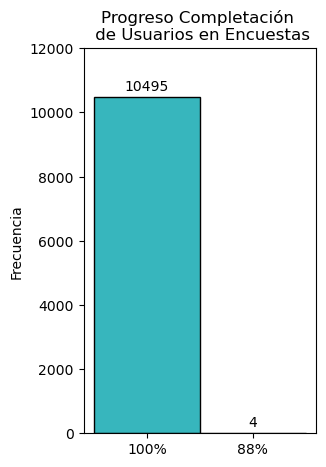

In [232]:
progresoValues = pd.DataFrame(numericVariables["Progreso"].value_counts())

fig = plt.figure(figsize = (3, 5))

barProgreso = plt.bar([0,0.5], progresoValues["Progreso"], color ='#37b6bd',
                      width = 0.5, align = "center", ec = "black")

plt.ylim([0,12000])
progresoLocs, progresoLabels = plt.xticks([0, 0.5], labels = progresoValues.index.astype(str) + "%")

for i, bar in enumerate(barProgreso):
    plt.text(x = bar.get_x() + bar.get_width() / 2.0, y = bar.get_height() + 200, s = f"{bar.get_height()}", ha = "center")

plt.title("Progreso Completación \n de Usuarios en Encuestas")
plt.ylabel("Frecuencia")

plt.show()

Cuartiles de variable de "Duración" en segundos

- 0%   : 25
- 25%  : 119
- 50%  : 190
- 75%  : 361
- 100% : 1298823

In [302]:
numericVariables['Duración'].quantile([0,0.25, 0.5, 0.75,1])

0.00         25.0
0.25        119.0
0.50        190.0
0.75        361.0
1.00    1298823.0
Name: Duración, dtype: float64

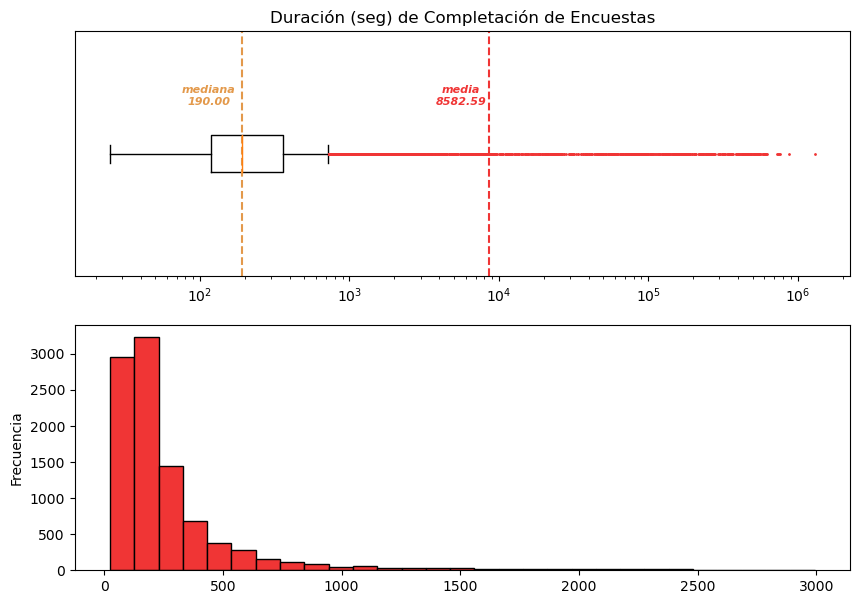

In [300]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,7))

filteredDuracion = numericVariables[numericVariables["Duración"] <= 3000]

results = ax1.boxplot(numericVariables["Duración"], vert = False,
                      flierprops={'marker': 'o', 
                                  'markersize': 1,
                                  'markerfacecolor' : '#f03535', 
                                  'markeredgecolor' : '#f03535'})

ax1.set_title("Duración (seg) de Completación de Encuestas")
ax1.set_xscale("log")
ax1.get_yaxis().set_visible(False)
ax1.axvline(numericVariables["Duración"].median(), color = "#e3994b", ls='--')
ax1.axvline(numericVariables["Duración"].mean(), color = "#f03535", ls='--')

ax1.text(x = numericVariables["Duración"].median() - 75, y = 1 + 0.20, 
         s = f"mediana\n{numericVariables['Duración'].median():.2f}", 
         ha = "center", fontsize = 8, fontstyle = "oblique", fontweight = "bold",
         color = "#e3994b")

ax1.text(x = numericVariables["Duración"].mean() - 3000, y = 1 + 0.20, 
         s = f"media\n{numericVariables['Duración'].mean():.2f}", 
         ha = "center", fontsize = 8, fontstyle = "oblique", fontweight = "bold",
         color = "#f03535") 

ax2.hist(filteredDuracion["Duración"],  
         bins = np.linspace(filteredDuracion["Duración"].min(),
                            filteredDuracion["Duración"].max(),
                            30),
         color = "#f03535",
         ec = "black")
ax2.set_ylabel("Frecuencia")

plt.show()

**¿Se quiere realizar un análisis para encontrar de cuales países provienen los resultados de la encuesta?**

In [308]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

C:\Users\luisa\AppData\Local\Temp\ipykernel_10836\3542021098.py:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



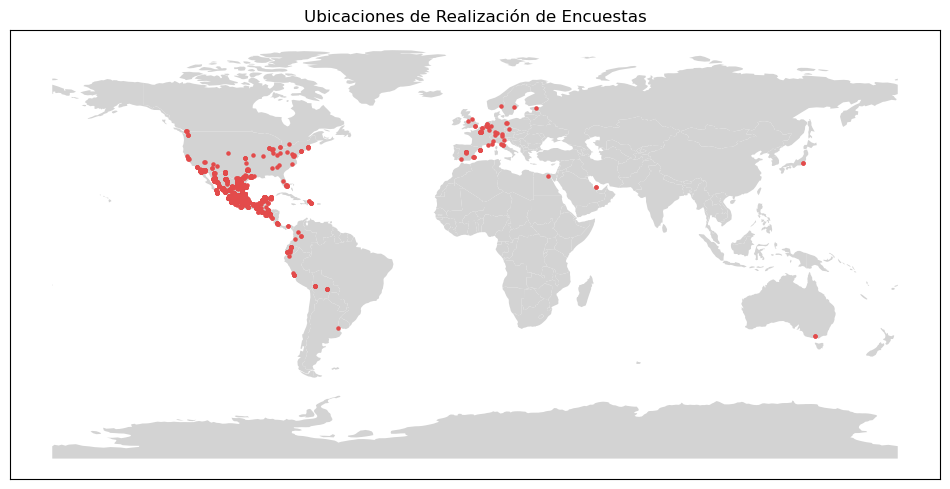

In [342]:
geometry = [Point(xy) for xy in zip(numericVariables['Longitud'], numericVariables['Latitud'])]
gdf = GeoDataFrame(numericVariables, geometry = geometry)

fig, axMap = plt.subplots(figsize=(12, 6))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax = axMap,color = 'lightgray', markersize = 5)

plt.scatter(numericVariables['Longitud'], numericVariables['Latitud'], color = '#e34b4b', s=5)

axMap.get_xaxis().set_visible(False)
axMap.get_yaxis().set_visible(False)

axMap.set_title("Ubicaciones de Realización de Encuestas")

plt.show()

## Comprensión

In [8]:
# Exploración
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 0 to 368
Data columns (total 43 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                            Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                                                                                                                                                                                                            --------------  

In [9]:
# Estadística variables cuantitativas

cuantitativas = raw_data.drop(labels=["Datos de referencia externos", "Nombre del destinatario", "Correo electrónico del destinatario", "CRN", "Periodo"], axis=1)
cuantitativas.describe()


,Progreso,Duración (en segundos),Latitud de ubicación,Longitud de ubicación
count,10499.000000,1.049900e+04,10495.000000,10495.000000
mean,99.995428,8.582590e+03,24.995108,-99.212264
std,0.234194,5.214845e+04,4.066914,10.763758
min,88.000000,2.500000e+01,-37.828000,-123.133700
25%,100.000000,1.190000e+02,25.644897,-100.325800
50%,100.000000,1.900000e+02,25.654600,-100.311000
75%,100.000000,3.610000e+02,25.680200,-100.263100
max,100.000000,1.298823e+06,59.955000,144.966900


In [12]:
# Moda de variables
o = pd.DataFrame(raw_data.agg(stat.mode)).rename(columns={0:"mode"}).index
l = ["Fecha de inicio", "Fecha final","Tipo respuesta", "IP","Progreso","Duración","Finalizado","Fecha registrada","ID respuesta","Apellido","ID","Datos referencia externos","Latitud", "Longitud", "Canal de distribución", "Idioma","P1.1","P1.2","P1.3","P1.4","P1.5","P1.6","P1.7","P1.8","P2","P3","Comentario para OSF","P5.1","P5.2","P5.3","P5.4","Comentario general","Tipo comentario","NomOSF_Experiencia","OSF","CRN", "Nombre destinatario", "Correo", "OSF y nombre proyecto", "Nombre experiencia", "Periodo", "Formato", "Matrícula", "Semana"]
pd.DataFrame(raw_data.agg(stat.mode)).rename(columns={0:"mode"}).rename(index=dict(zip(o,l)))



,mode
Fecha de inicio,2021-05-29 10:19:02
Fecha final,2022-11-28 21:45:52
Tipo respuesta,IP Address
IP,131.178.200.61
Progreso,100
Duración,104
Finalizado,True
Fecha registrada,2021-04-22 13:26:38.693000
ID respuesta,R_12tdDn1LDz4BmzD
Apellido,NaN


In [13]:
pd.DataFrame(raw_data.agg(stat.mode)).rename(columns={0:"mode"}).rename(index=dict(zip(o,l))).shape

(43, 1)

In [11]:
# Tablas de frecuencia de variables categóricas
cualitativas = raw_data.drop(labels=["Fecha de inicio", "Fecha final", "Dirección IP", "Duración (en segundos)", "Fecha registrada", "ID de respuesta", "Apellido del destinatario", "ID", "Latitud de ubicación", "Longitud de ubicación", "CRN", "Matrícula con A0XXXXXXX:"], axis=1)
for i in cualitativas:
    print(pd.DataFrame(raw_data[i].value_counts()))
    print()


                Tipo de respuesta
IP Address                  10491
Spam                            5
Survey Preview                  3

     Progreso
100     10495
88          4

       Finalizado
True        10495
False           4

Empty DataFrame
Columns: [Datos de referencia externos]
Index: []

           Canal de la distribución
anonymous                      5056
email                          3856
gl                               64
preview                           3

       Idioma del usuario
ES-ES               10499

                     1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.
\n5 Muy Satisfecho                                                6787                                                    
 4                                                                2797                                                    
 3                                                                 712                         

In [12]:
# Cantidad de filas y columnas ANTES DE HACER LIMPIEZA
raw_data.shape

(10499, 43)

In [13]:
# Valores de las columnas
"""
for i in raw_data:
    print(i)
    print(raw_data[i].unique())
"""

'\nfor i in raw_data:\n    print(i)\n    print(raw_data[i].unique())\n'

## Preparación de datos (limpieza)

In [35]:
# Si más del 50 % de la columna está vacía, se considera borrarla dependiendo de los datos que tenga.
col_inutiles = []
for i in raw_data:
    if raw_data[i].isnull().sum()>=len(raw_data)*0.5:
        col_inutiles.append(i)

# Escogemos los índices de las columnas que eliminaremos porque no servirán para el análisis
col_eliminar=[1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 35, 36, 39, 40, 41, 42]

a = 0
for i in col_eliminar:
    col_eliminar[a]=raw_data.columns[i]
    a+=1

In [39]:
# Eliminación de columnas no necesarias
df = raw_data.copy()
df = df.drop(labels=col_eliminar, axis=1)
df

,Fecha de inicio,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,...,P5.1,P5.2,P5.3,P5.4,Comentario general,Tipo comentario,OSF,CRN,OSF y nombre proyecto,Nombre experiencia
0,2021-04-22 13:24:25,100,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-22 17:35:09,100,207,4,\n5 Muy Satisfecho,4,\n5 Muy Satisfecho,4,\n5 Muy Satisfecho,\n5 Muy Satisfecho,...,4,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Es complicado conseguir colaboraciones en esto...,Reconocimiento,León Ortigosa ABP,26892.0,NaN,NaN
2,2021-04-22 18:31:39,100,168,4,4,4,4,2,4,4,...,4,4,4,4,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento,"Comenzar de Nuevo, A.C.",26918.0,NaN,NaN
3,2021-04-23 04:47:59,100,349,4,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Lo único que me desagrado del servicio fue la ...,Área de oportunidad,"Casa Paterna La Gran Familia, A.C.",26913.0,NaN,NaN
4,2021-04-23 07:45:14,100,245,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,3,3,\n5 Muy Satisfecho,\n5 Muy Satisfecho,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Me gusto mucho la experiencia por la apertura ...,Reconocimiento,"Programa de Acompañamiento de Servicio Social,...",26933.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2023-05-05 19:27:32,100,380,4,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,4,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Me pareció muy interesante todo el proceso de ...,Reconocimiento,NaN,NaN,"Tierra de Artistas, A.C.",NaN
365,2023-05-05 20:30:55,100,572,4,4,4,4,4,4,4,...,4,4,4,4,No he tenido la oportunidad de realizar las ac...,Área de oportunidad,NaN,NaN,Community First (Campus Cumbres),NaN
366,2023-05-08 13:58:27,100,305,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,4,\n5 Muy Satisfecho,\n5 Muy Satisfecho,...,4,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Muy buena experiencia al practicar un poco de ...,Reconocimiento,NaN,NaN,Secretaría de Educación de Nuevo León: Coordin...,NaN
367,2023-05-08 18:35:40,100,145,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,\n5 Muy Satisfecho,...,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,\n5 Totalmente de Acuerdo,Excelente asociacion,Reconocimiento,NaN,NaN,FUERZA Y ESPERANZA POR UNO MÁS,NaN


In [41]:
raw_data["Fecha de inicio"]

0     2021-04-22 13:24:25
1     2021-04-22 17:35:09
2     2021-04-22 18:31:39
3     2021-04-23 04:47:59
4     2021-04-23 07:45:14
              ...        
364   2023-05-05 19:27:32
365   2023-05-05 20:30:55
366   2023-05-08 13:58:27
367   2023-05-08 18:35:40
368   2023-05-13 01:06:15
Name: Fecha de inicio, Length: 10499, dtype: datetime64[ns]

In [37]:
nombres_nuevos = ["Fecha","Progreso","Duración","P1.1","P1.2","P1.3","P1.4","P1.5","P1.6","P1.7","P1.8","P2","P3","Comentario para OSF","P5.1","P5.2","P5.3","P5.4","Comentario general","Tipo comentario","NomOSF_Experiencia","OSF","CRN"]

df = df.rename(columns = dict(zip(df.columns, nombres_nuevos)))
df = df.drop(labels=0)# Dataframe unido con columnas renombradas
df.columns

Index(['Fecha', 'Progreso', 'Duración', 'P1.1', 'P1.2', 'P1.3', 'P1.4', 'P1.5',
       'P1.6', 'P1.7', 'P1.8', 'P2', 'P3', 'Comentario para OSF', 'P5.1',
       'P5.2', 'P5.3', 'P5.4', 'Comentario general', 'Tipo comentario',
       'NomOSF_Experiencia', 'OSF', 'CRN', 'Nombre experiencia'],
      dtype='object')

In [17]:
# Reemplazar valores de 5 y 1 en todas las columnas
for i in df:
    df[i] =df[i].replace({
    "\n5 Totalmente de Acuerdo": 5,
    "\n5 Muy Satisfecho": 5,
    " 4": 4,
    " 3": 3,
    " 2": 2,
    "\n1 Nada Satisfecho": 1,
    "\n1 Nada de Acuerdo": 1
    })

df.head()

,Fecha,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,...,P5.1,P5.2,P5.3,P5.4,Comentario general,Tipo comentario,NomOSF_Experiencia,OSF,CRN,Nombre de Experiencia
1,2021-04-22 17:35:09,100,207,4.0,5.0,4.0,5.0,4.0,5.0,5.0,...,4.0,5.0,5.0,5.0,Es complicado conseguir colaboraciones en esto...,Reconocimiento,León Ortigosa ABP,26892.0,NaN,NaN
2,2021-04-22 18:31:39,100,168,4.0,4.0,4.0,4.0,2.0,4.0,4.0,...,4.0,4.0,4.0,4.0,"Pues ojalá que ahora sí me valgan mis horas, n...",Reconocimiento,"Comenzar de Nuevo, A.C.",26918.0,NaN,NaN
3,2021-04-23 04:47:59,100,349,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,Lo único que me desagrado del servicio fue la ...,Área de oportunidad,"Casa Paterna La Gran Familia, A.C.",26913.0,NaN,NaN
4,2021-04-23 07:45:14,100,245,5.0,5.0,5.0,3.0,3.0,5.0,5.0,...,5.0,5.0,5.0,5.0,Me gusto mucho la experiencia por la apertura ...,Reconocimiento,"Programa de Acompañamiento de Servicio Social,...",26933.0,NaN,NaN
5,2021-04-23 08:48:17,100,151,4.0,3.0,3.0,3.0,4.0,5.0,5.0,...,4.0,4.0,4.0,4.0,"No sentí que mi trabajo tuviera impacto, fue m...",Área de oportunidad,Casa Monarca Ayuda Humanitaria al Migrante A.B.P.,26931.0,NaN,NaN


## Exploración de datos limpios

In [18]:
# Cantidad de filas y columnas DESPUÉS DE HACER LIMPIEZA
df.shape

(10494, 24)

In [19]:
df.describe()

,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,P1.8,P5.1,P5.2,P5.3,P5.4,OSF
count,10494.000000,1.049400e+04,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,10493.000000,5803.000000
mean,99.995426,8.586621e+03,4.532831,4.588488,4.561422,4.488897,4.304775,4.492328,4.473935,4.460974,4.599638,4.717907,4.723911,4.712761,21150.475788
std,0.234249,5.216055e+04,0.738486,0.694533,0.719511,0.834810,0.945490,0.841104,0.866857,0.839893,0.701904,0.564130,0.576511,0.588220,10631.405239
min,88.000000,2.500000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,341.000000
25%,100.000000,1.190000e+02,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,23487.000000
50%,100.000000,1.900000e+02,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,23886.000000
75%,100.000000,3.617500e+02,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,28036.000000
max,100.000000,1.298823e+06,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,43269.000000


In [20]:
df.dtypes

Fecha                    datetime64[ns]
Progreso                          int64
Duración                          int64
P1.1                            float64
P1.2                            float64
P1.3                            float64
P1.4                            float64
P1.5                            float64
P1.6                            float64
P1.7                            float64
P1.8                            float64
P2                               object
P3                               object
Comentario para OSF              object
P5.1                            float64
P5.2                            float64
P5.3                            float64
P5.4                            float64
Comentario general               object
Tipo comentario                  object
NomOSF_Experiencia               object
OSF                             float64
CRN                              object
Nombre de Experiencia            object
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10494 entries, 1 to 368
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  10494 non-null  datetime64[ns]
 1   Progreso               10494 non-null  int64         
 2   Duración               10494 non-null  int64         
 3   P1.1                   10493 non-null  float64       
 4   P1.2                   10493 non-null  float64       
 5   P1.3                   10493 non-null  float64       
 6   P1.4                   10493 non-null  float64       
 7   P1.5                   10493 non-null  float64       
 8   P1.6                   10493 non-null  float64       
 9   P1.7                   10493 non-null  float64       
 10  P1.8                   10493 non-null  float64       
 11  P2                     10493 non-null  object        
 12  P3                     10493 non-null  object        
 13  Com

In [19]:
no_terminados=df[df["Progreso"]<100]
no_terminados

,Fecha,Progreso,Duración,P1.1,P1.2,P1.3,P1.4,P1.5,P1.6,P1.7,...,P5.1,P5.2,P5.3,P5.4,Comentario general,Tipo comentario,NomOSF_Experiencia,OSF,CRN,Nombre de Experiencia
2000,2021-07-22 17:15:42,88,58,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,Ñ,NaN,Fundacionplan.org | Plan SPAP A.C.,346.0,NaN,NaN
3251,2021-11-23 08:19:20,88,6989,4.0,4.0,5.0,5.0,5.0,4.0,5.0,...,5.0,5.0,5.0,5.0,El propósito es noble y me gusta formar parte ...,NaN,Dirección de Servicio Social - Aprendizajes pa...,23478.0,NaN,NaN
4434,2021-12-02 13:27:21,88,179,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,Me gusto mucho ser parte de este proyecto soli...,NaN,Centro Virtual de Aprendizaje Tec de Monterrey,23492.0,NaN,NaN
1340,2022-06-09 08:39:33,88,68,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,Me gustó la actitud de los muchachos,NaN,Dirección de Servicio Social - Aprendizajes pa...,28008.0,NaN,Aprendamos Juntos: Coordinador Académico Matem...
